In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Read in the data
df = pd.read_csv('advertising.csv')
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot: >

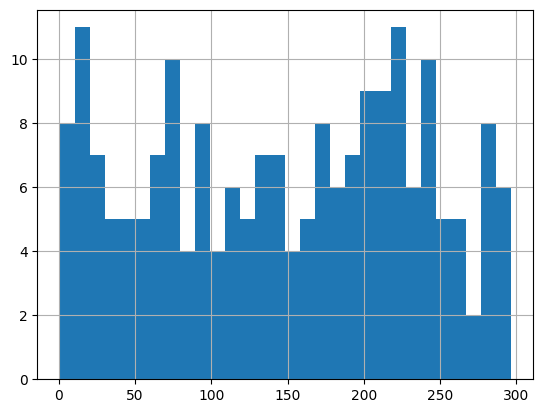

In [11]:
df['TV'].hist(bins=30)

<AxesSubplot: >

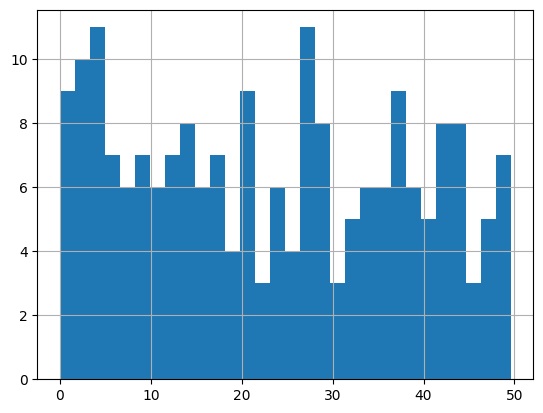

In [12]:
df['Radio'].hist(bins=30)

<AxesSubplot: >

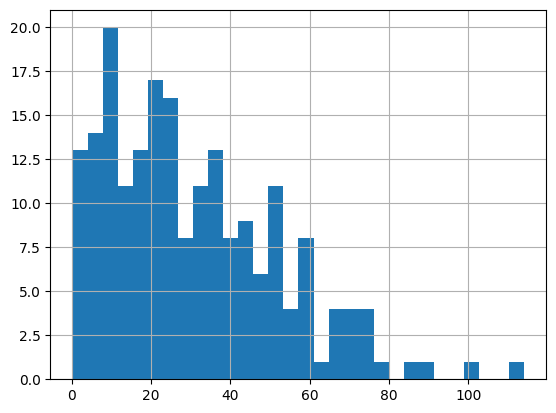

In [13]:
df['Newspaper'].hist(bins=30)

<AxesSubplot: >

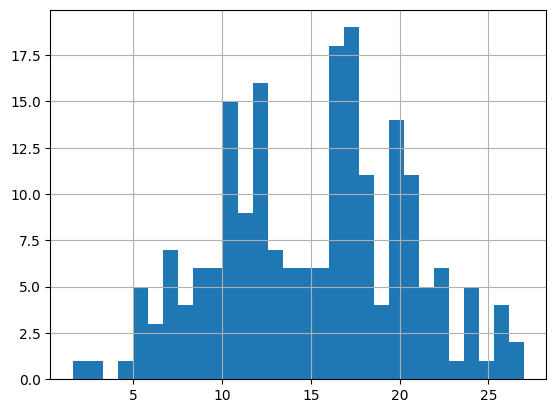

In [14]:
df['Sales'].hist(bins=30)

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame=df, x="Sales",
                    y="TV", size="TV", trendline="ols")
figure.show()

In [17]:
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame=df, x="Sales",
                    y="Radio", size="Radio", trendline="ols")
figure.show()

In [18]:
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame=df, x="Sales",
                    y="Newspaper", size="Newspaper", trendline="ols")
figure.show()

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


<AxesSubplot: >

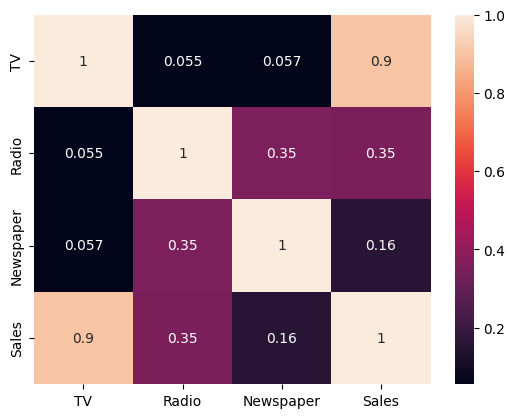

In [19]:
correlation = df.corr()
print(correlation["Sales"].sort_values(ascending=False))
sns.heatmap(correlation, annot=True)

In [20]:
x = np.array(df.drop(["Sales"], 1))
y = np.array(df["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.1,
                                                random_state=42)

/tmp/ipykernel_27871/4271030702.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [21]:
model = LinearRegression()
model.fit(xtrain,ytrain)
print(model.score(xtest, ytest))

0.9125420182627616


In [22]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[163.3,  31.6,  52.9]])
print(model.predict(features))

[16.95475874]


In [1]:
# save model
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [5]:
# load model
model = pickle.load(open('model.pkl', 'rb'))
print(model.predict(features))

[16.95475874]
